# Demo of the "on-the-fly" ethnicity filter

#### Import the needed libraries

In [ ]:
from giskard_vision.landmark_detection.dataloaders.loaders import DataLoaderFFHQ
from giskard_vision.landmark_detection.visualisation.draw import draw_marks
from giskard_vision.landmark_detection.dataloaders.wrappers import EthnicityDataLoader
from giskard_vision.core.dataloaders.wrappers import CachedDataLoader, FilteredDataLoader

#### Load the main dataset

In [ ]:
dl = DataLoaderFFHQ("../datasets/ffhq")

#### Define two dataloaders to filter out images of `asian` and `white` ethnicities

In [4]:
ethnicity_dl = EthnicityDataLoader(dl, ethnicity_map={"indian": "asian"})
cached_dl = CachedDataLoader(ethnicity_dl, cache_size=None, cache_img=False, cache_labels=False)
dl.name

asians = FilteredDataLoader(cached_dl, lambda elt: elt[2]["ethnicity"] == "asian")
whites = FilteredDataLoader(cached_dl, lambda elt: elt[2]["ethnicity"] == "white")

#### Asian ethnicity

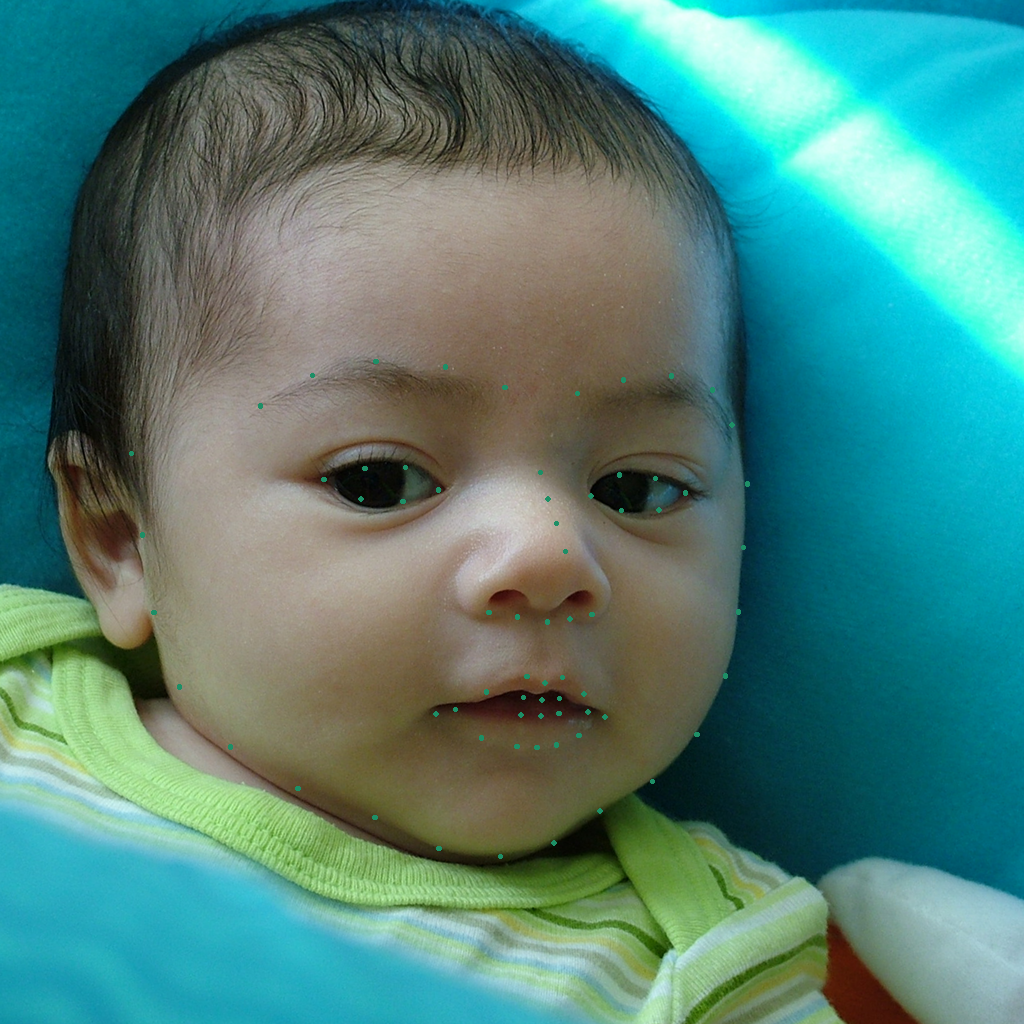

In [5]:
img, marks, _ = asians[0]
draw_marks(
    img[0],
    marks,
)

#### White ethnicity

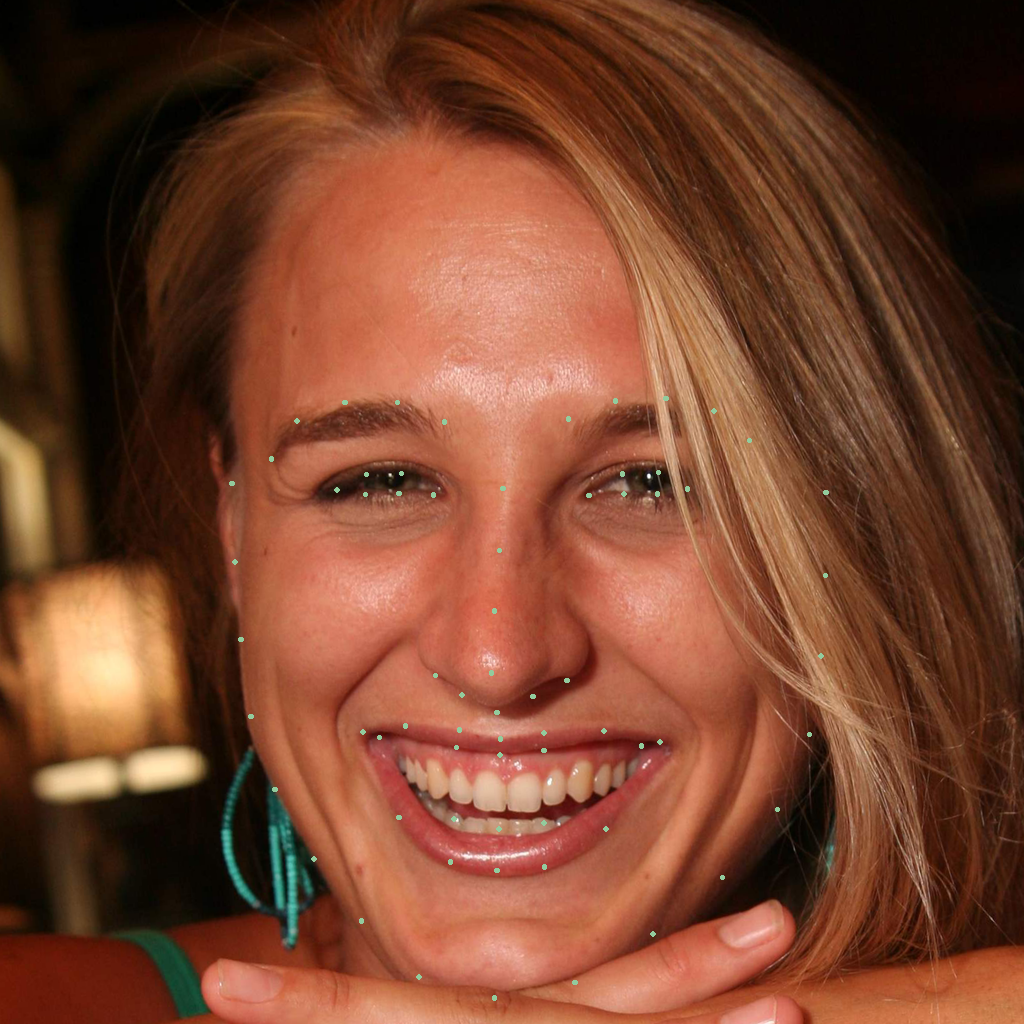

In [8]:
img, marks, _ = whites[0]
draw_marks(
    img[0],
    marks,
)